<a href="https://colab.research.google.com/github/Rafael-Salomao/Data_Science/blob/main/Analisando_os_Dados_do_Airbnb_Dublin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - Dublin

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2021, a Startup fundada quase 15 anos atrás, já havia **hospedado mais de 1 bilhão** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Dublin, Irlanda; e ver quais insights podem ser extraídos a partir de dados brutos.**

In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

%matplotlib inline

## Obtenção dos Dados

Como mencionado o site do Airbnb conta com uma base de dados open source com dados reais das principais cidades do mundo.

A base de dados utilizada para este é a opção que contem informações resumidas e métricas para listagem dos imóveis disponíveis no Airbnb em Dublin.
  - O arquivo utilizado na análise em questão foi retirado do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).
  - No Portal também há a opção de uma base mais completa, uma versão mais detalhada..



In [35]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/Rafael-Salomao/Data_Science/main/dublin_listings.csv')

## Análise dos Dados

Com as bibliotecas e dataframe importados, é importante fazer uma breve visualização dos dados. Para que, seja possível ter uma visão geral dos dados e obter uma consciência situcional das informações.

**Dicionário das variáveis**

* `id` - número de Id para identificação do imóvel;
* `name` - nome do imóvel;
* `host_id` - número de Id para identificação do anfitrião;
* `host_name` - nome do anfitrião;
* `neighbourhood_group` - não temos valores válidos nesta coluna;
* `neighbourhood` - nome do bairro;
* `latitude` - coordenada da latitude do imóvel;
* `longitude` - coordenada da longetude do imóvel;
* `room_type` - informa o tipo de quarto oferecido;
* `price` - preço para alugar o imóvel;
* `minimum_nights` - mínimo de noites para se hospedar; 
* `number_of_reviews` - número de review que a propriedade possui;
* `last_review` - data do último review recebido;
* `reviews_per_month` - número de review recebidos por mês;
* `calculated_host_listings_count` - número de imóveis que o anfitrião possui;
* `availability_365` - número de dias que o imóvel está disponível no ano;



Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25792,Private room,65,3,227,2020-03-06,1.74,3,233,0,NaN
1,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.29885,-6.31850,Private room,30,1,1,2019-05-11,0.03,1,99,0,NaN
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29209,-6.25624,Private room,61,3,182,2020-03-09,1.42,3,323,0,NaN
3,159889,Friendly Single Room,766611,Margaret,NaN,Dublin City,53.39027,-6.23547,Private room,40,2,316,2021-12-05,2.67,3,324,5,NaN
4,162809,5.5 miles south of Dublin City :^),777681,Robert,NaN,Dn Laoghaire-Rathdown,53.28326,-6.19188,Private room,65,1,288,2021-10-19,3.62,2,114,4,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Uma etapa importante para a análise situacional é verificar as dimensões do Dataframe. 

Junto a isso, verificar os tipos de entradas das variáveis. Esta análise é fundamental para darmos sequência em nosso processo exploratório.

In [4]:
# identificar o volume de dados do DataFrame
df.shape
print('Entradas:\t{}'.format(df.shape[0]))
print('Variáveis:\t{}\n\n---- Tipos das variáveis ----\n'.format(df.shape[1]))

# verificar tipos entradas do dataset
df.dtypes

Entradas:	6977
Variáveis:	18

---- Tipos das variáveis ----



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Um dos problemas mais comuns encontrados ao utilizar com um dataset de um problema real é lidar com os *valores nulos*. Eles devem ser tratados devidamente para evitar futuros problemas nas análises desejadas. 

Para dar seguimento à está análise, iremos avaliar o percentual de *valores nulos* presentes no dataset.

Para visualizar os *valores nulos* de cada uma das colunas do dataset é necessário utilizar a função `.isnull()`. Como o intuito deste tópico é verificar a porcentagem de cada coluna, também é preciso usar a função `.sum()` e dividir pelo valor total de entradas de cada variável.

Por fim, para uma melhor visualização as porcentagens de valores nulos foram colocadas em ordem decrescente por meio da função `.sort_values`.

In [5]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending = False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.207826
last_review                       0.207826
host_name                         0.001290
name                              0.000143
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

**Observações:**

* As colunas `neighbourhood_group`e `license` não apresentam nenhum valor válido. Com isso, não farão parte de nossa análise e podemos removê-las.
* Os valores nulos das colunas `name` e `host_name` representam menos que 1% do dataset em questão. Sendo assim, está quantidade é considerada irrelevante em nossa análise e também podem ser removidos.
* As colunas `last_review` e `reviews_per_month` contam com mais de 20% de seus valores nulos. Entretanto, será preciso analisar mais a fundo para verificar como iremos tratar este caso.

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para uma visão geral da distribuição das entradas das variáveis numéricas, irei plotar os `histogramas` referentes a cada uma delas.

Os `histogramas` são gráficos de barras que demonstram a distribuição da uma lista de entradas. Com isso, é possível resumir um grande conjunto de dados de modo visual, ao mesmo tempo que se torna viavel a comparação de resultados encontrados em diferentes variáveis. 

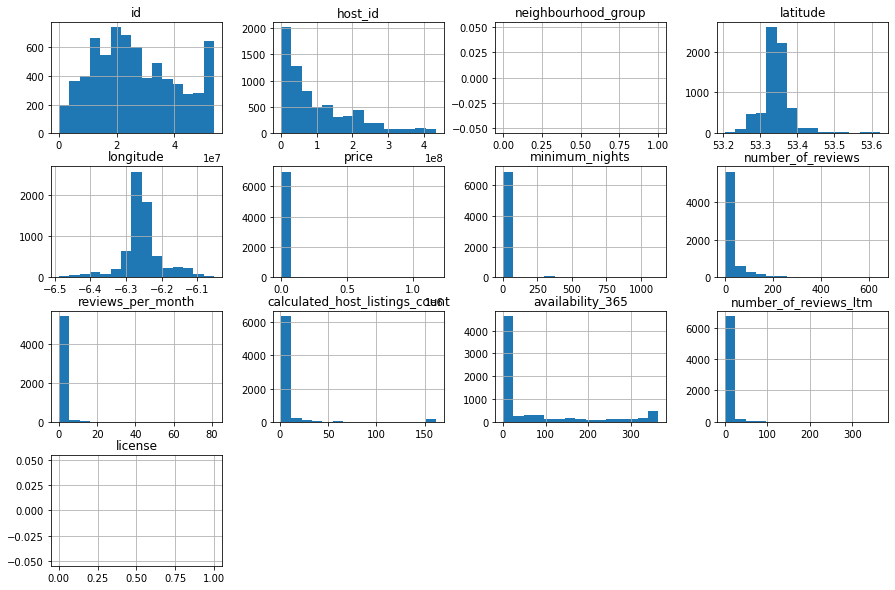

In [6]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

**Observações**
* A partir das distribuições encontradas em alguma variáveis, é possível inferir a presença de outliers nas entradas.
* As variáveis `price`, `minimum_nights`, `number_of_reviews`,`reviews_per_month` e `calculated_host_listings_count` apresentam indícios de apresentarem outliers.

### **Q4. Identificar Outliers**

Com base nos indícios mencionados acima, iremos analisar a presença de Outliers.

Em estatística, o Outlier, que também pode ser chamado de valor atípico, se trata de uma observação de um valor de entrada que aprensenta um grande afastamento no conjunto de valores em questão.

A existência de Outliers implica, em grande parte dos casos, em tendências indesejáveis e prejuízos na interpretação dos resutados. 

É preciso tratar os Outliers devidamente a fim de reduzir os desequilíbrios por eles gerados na série. Para isso, iremos identificar os Outliers de duas diferentes maneiras:

* Análise estatística das variáveis a partir do `.describe()`
* Plotar um gráfico `boxplots`, para uma análise mais visual.

In [7]:
# mostrar a descrição das entradas numéricas utilizando a função .describe()
df[['price','minimum_nights','number_of_reviews','reviews_per_month',
    'calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6.977000e+03,6977.000000,6977.000000,5527.000000,6977.000000,6977.000000
mean,3.019986e+02,8.927189,30.272753,0.963123,7.251971,65.408772
std,1.405164e+04,42.118071,59.819724,2.070010,25.062374,114.209065
min,9.000000e+00,1.000000,0.000000,0.010000,1.000000,0.000000
25%,5.500000e+01,1.000000,1.000000,0.100000,1.000000,0.000000
50%,8.500000e+01,2.000000,6.000000,0.390000,1.000000,0.000000
75%,1.480000e+02,4.000000,29.000000,1.190000,3.000000,78.000000
max,1.173721e+06,1125.000000,648.000000,81.060000,162.000000,365.000000


No presente projeto iremos focar as análises nas variáveis `price` e `minimum_nights`.

**Observações**
* Para a variável `price`, 75% das entradas são menores que 150 sendo que o maior valor é de 1.173.721.
* Já para a variável `minimum_nights`, o valor máximo encontrado é de 1125 dias - equivalente a mais de dois anos de tempo mínimo de estadia.
* Para ambas variáveis:
 * Ao comparar os valores das medianas com as médias das entradas, há um forte indício dos maiores valores serem outliers.
 * Junto a isso, os desvios padrões são, relativamente, elevados em consideração as médias das entradas.


#### Boxplot para minimum_nights

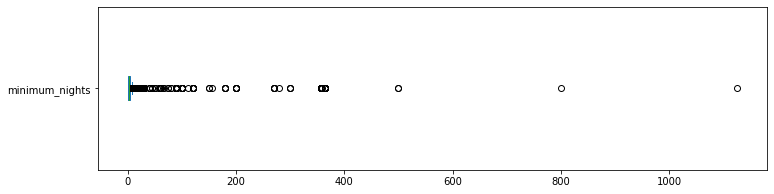

Variável -> `minimum_nights`

Quantidade de `minimum_nights` maior que 30 dias: 161
O porcentual de valores acima de 30 dias é: 2.31%


In [8]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert = False, figsize=(12,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print('Variável -> `minimum_nights`\n')
print('Quantidade de `minimum_nights` maior que 30 dias: {}'.format(len(df[df.minimum_nights > 30])))
print('O porcentual de valores acima de 30 dias é: {:.2f}%'.format(len(df[df.minimum_nights > 30])/df.shape[0]*100))

**Observações**
* A partir da visualização do gráfico de boxplot da variável `minimim_nights`, é possível notar a grandes disparidade de algumas entradas.
* Para minimizar o impacto dos outliers na análise final, tomou-se como premissa a utilização das entradas menores que 30 dias. Sendo assim, é válido ressaltar que - apesar de representarem 2.31% do total de entradas do dataset - foi necessário avaliar este *trade off*. Com isso, esperamos obter um resultado final mais condizente com a realidade.

#### Boxplot para price

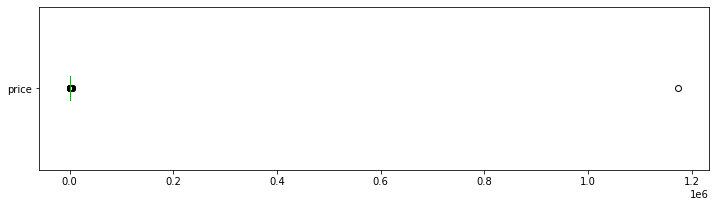

Variável -> `price`

Quantidade de `price` maior que 1200: 68
O porcentual de valores acima de 1200 é: 0.97%


In [9]:
# price
df.price.plot(kind='box', vert = False, figsize=(12,3))
plt.show()

# ver quantidade de valores acima de 1200 para price
print('Variável -> `price`\n')
print('Quantidade de `price` maior que 1200: {}'.format(len(df[df.price > 1200])))
print('O porcentual de valores acima de 1200 é: {:.2f}%'.format(len(df[df.price > 1200])/df.shape[0]*100))

**Observações**
* Iremos utilizar do mesmo racional utilizado na variável `minimim_nights` para fazer a limpeza da variável `price`.
* Tomou-se como premissa a utilização apenas das entradas menores que 1200. Sendo que, tais valores a serem retirados correspondem a 0.97% das entradas totais.


#### Histograma sem *outliers*

Com a identificação dos Outliers nas variáveis `price` e `minimum_night`, é preciso fazer um tratamento dos dados.

A limpeza das variáveis, neste caso, é feito levando em consideração os valores estabelecidos no tópico anterior. Com isso, as variáveis analisadas terão uma menor quantidade de Outliers, favorecendo o resultado final de nossa análise.

Após o tratamento das informações, os histogramas e boxplots serão plotados novamente, a fim de obter uma comparação da distribuição das entradas originais e após a retirada de uma parte considerável de Outliers.

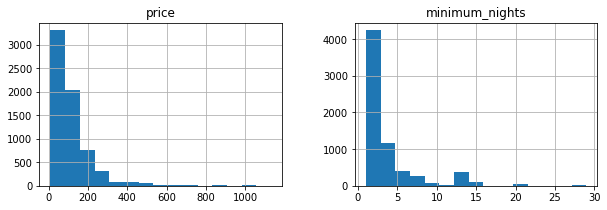

In [10]:
# fazer uma copia do dataframe
df_clean = df.copy()

# tratar variáveis `price` e `minimum_nights`.
df_clean = df_clean[df_clean.price < 1200]
df_clean = df_clean[df_clean.minimum_nights < 30]

# remover `neighbourhood_group` e `license`, pois estão vazias.
df_clean.drop(columns = ['neighbourhood_group', 'license'], axis=0, inplace = True)

# plotar novo histograma
df_clean[['price','minimum_nights']].hist(bins=15, figsize=(10,3));

**Observações**
* Após a limpeza dos dados, é possível observar uma melhor distribuição nos histogramas das variáveis `price` e `minimum_nights`.
* Feito isso, conseguiremos ter resultados mais condizentes e precisos nas análises a seguir.

#### BoxPlot sem *outliers*

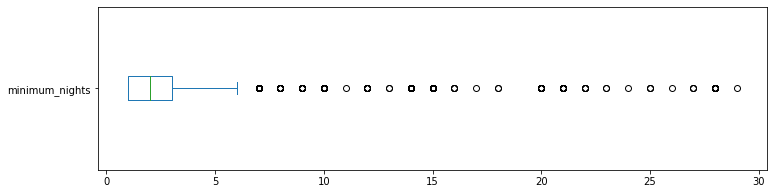

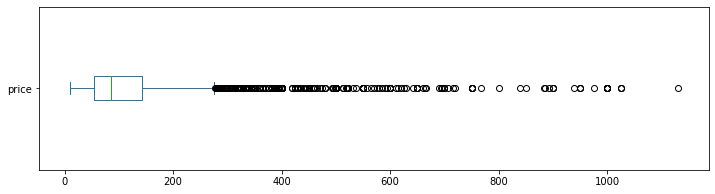

In [11]:
# minimum_nights
df_clean.minimum_nights.plot(kind='box', vert = False, figsize=(12,3))
plt.show()

# price
df_clean.price.plot(kind='box', vert = False, figsize=(12,3))
plt.show()

### **Q5. Qual a correlação existente entre as variáveis**

Um artifício utilizado para analise de dados em dataset com diversas variáveis é a `matriz de correlação`.

A `matriz de correlação` é simplesmente uma tabela que mostra o coeficientes de correlação existentes entre diferentes variáveis.

Por ser capaz de explicitar as correlações entre as variáveis. A `matriz de correlação` é considerada uma ótima ferramenta para resumir dataset extensos a fim de identificar e visualizar padrões existentes

Tendo isso em vista, primeiramente, irei plotar um `matriz de correlação` e, em seguida, um `heatmap` para que sej a possível visualizar as correlações de maneira mais intuitiva.

In [12]:
# criar uma matriz de correlação
corrMatrix = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count',
                       'availability_365']].corr()

# mostrar a matriz de correlação
corrMatrix

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.075697,-0.036346,-0.028605,-0.054846,0.110996
minimum_nights,0.075697,1.000000,-0.021502,-0.038225,-0.005318,0.055693
number_of_reviews,-0.036346,-0.021502,1.000000,0.530792,-0.063800,0.125750
reviews_per_month,-0.028605,-0.038225,0.530792,1.000000,0.074950,0.206808
calculated_host_listings_count,-0.054846,-0.005318,-0.063800,0.074950,1.000000,0.385821
availability_365,0.110996,0.055693,0.125750,0.206808,0.385821,1.000000


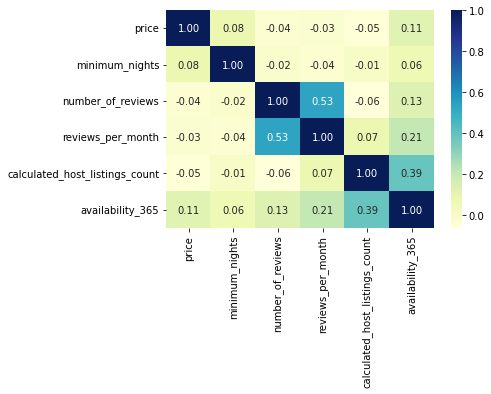

In [13]:
# plotar um heatmap a partir das correlações
sn.heatmap(corrMatrix, cmap="YlGnBu", fmt='.2f', annot=True)
plt.show()

**Observações**
* A variável `number_of_reviews` tem alta correlação com `reviews_per_month`, o que é esperado, visto que quanto mais reviews um imóvel, maior será a sua média mensal. Sendo assim, por terem forte correlação entre si, pode se considerar a retirada de uma das variáveis de nossa análise, tornando o DataFrame mais enxuto.
* Há uma correlação elevada entre `calculated_host_listings_count` e `availability_365`. Uma possível hipótese seria devido ao fato de hosts que têm mais quantidades de imóveis, utilizam seus imóveis apenas para aluguel, deixando-os disponíveis para hospedes na maior parte do ano. Já para host com imóveis únicos, estes alugam suas próprias casa em que moram, deixando-as disponíveis durante um menor período de tempo.


### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**

Para verificar qual o tipo de imóvel mais alugado no Airbnb, será utilizada a função `.value_counts`. Esta função, é utilizada para contar a quantidade de cada um dos valores únicos encontrados em uma série de dados.

Junto a isso, também pode-se observar a porcentagem de cada tipo de imóvel comparado ao dataset total.

In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts(ascending=False)

Entire home/apt    3268
Private room       3240
Shared room         134
Hotel room           53
Name: room_type, dtype: int64

In [15]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts(ascending=False)/df_clean.shape[0]*100

Entire home/apt    48.812547
Private room       48.394324
Shared room         2.001494
Hotel room          0.791636
Name: room_type, dtype: float64

### **Q7. Qual a média dos preços de aluguel?**

Outra análise básica matemática que podemos fazer, a fim de obter informações interessantes a respeito do dataset, é o cálculo da média.

Sendo assim, iremos observar o valor da média da variável `price`. A média pode ser calculada pela função `.mean()`.



In [16]:
# ver a média da coluna `price``
print('O preço médio dos alugueis de Airbnb na cidade de Dublin é de: ${:.2f}'.format(df_clean.price.mean()))

O preço médio dos alugueis de Airbnb na cidade de Dublin é de: $117.41


### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [17]:
# ver a média da coluna `minimum_nights`
print('O valor médio do mínimo de noites para aluguel é de: {:.2f} dias'.format(df_clean.minimum_nights.mean()))

O valor médio do mínimo de noites para aluguel é de: 3.51 dias


### **Q9. Qual a localidade mais cara do dataset?**

Para identificar a localidade de Dublin com a maior média de preços, foi preciso utilizar a função `.groupby`. Está função é utilizada para agrupar valores de uma variável, tomando como referência valores agrupados de outra variável desejada.

No caso tomou-se como base o agrupamento da variável `price` a partir dos valores únicos da variável `neighbourhood`.

Junto a isso, foi utilizado o `.mean()` para encontrar a média de preços para cada localidade da cidade de Dublin.


In [23]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)

neighbourhood
Dublin City              121.247346
Dn Laoghaire-Rathdown    114.530220
Fingal                   106.686047
South Dublin              78.107527
Name: price, dtype: float64

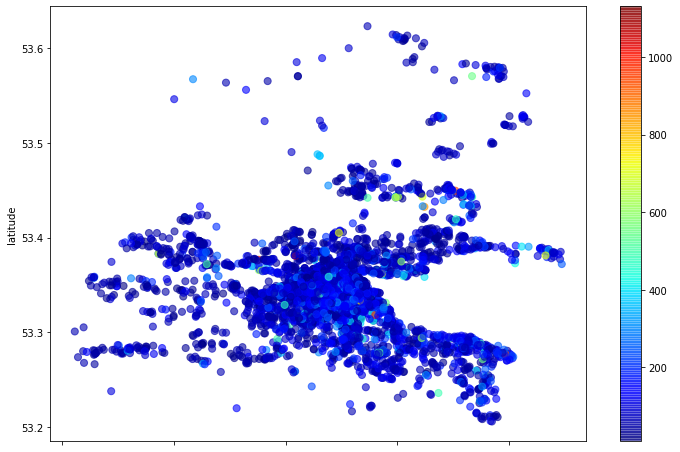

In [34]:
# plotar os imóveis pela latitude-longitude

df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.6, c=df_clean['price'], s=50,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões

Portanto, foi feita uma breve análise dos dados de imóveis do Airbnb na cidade de Dublin. 

Foi realizada uma análise introdutória sobre a estruturação e criação de um projeto de análise de dados. O intuito do projeto foi apresentar alguns artifícios estatísticos, gráficos e raciocínios necessários na construção de um projeto envolvendo a análise de um dataset.

Tendo isso em vista, foi possível tirar algumas conclusões da base de dados utilizada, como: 
  - a presença de outliers, 
  - proporção de cada tipo e imóvel disponível,
  - correlação entre os valores das diferentes variáveis,
  - regiões maior caras para se alugar um imóvel. 

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, para uma análise mais sofisticada.